# BBHCloud (8 levels, no cooling, n256)

In [1]:
using Plots, Printf, Measures
using LaTeXStrings
include("../../../Utils/misc_stdout.jl")

Main.MiscStdout

## Strong Scaling

Zcs/sec
  BBHCloud-8lvl-nocool: [ 9.46e+07, 1.64e+08, 2.46e+08, 3.37e+08]


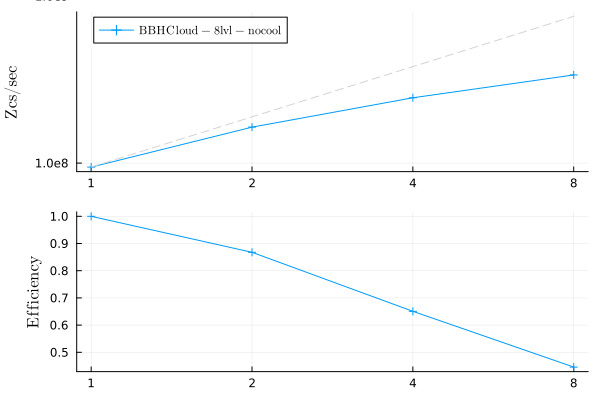

In [2]:
let patt_dirss = [
        ([
            (r"BBHCloud_8lvl_nocool_N\d+_r0000", "BBHCloud-8lvl-nocool"),
        ], "../data/BBHCloud_8lvl_nocool/n256/strong/", :cross),
    ]

    # Plot Zcs/sec
    plt1 = plot(ylabel=L"\mathrm{Zcs}/\mathrm{sec}", xscale=:log10, yscale=:log10)
    xs = [1, 2, 4, 8, 16]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [1e8, 1e9, 1e10]
    yticks!(plt1, ys, [string(n) for n in ys])

    # Plot Efficiency
    plt2 = plot(ylabel=L"\mathrm{Efficiency}", xscale=:log10)
    xticks!(plt2, xs, [string(n) for n in xs])
    
    println("Zcs/sec")
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        dats, labs = MiscStdout.load_avgs(patterns, parent_dir; option = "ZcsPerSecond", range=:)
        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            # Plot Zcs/sec
            plot!(plt1, dat[1], dat[2], label = L"\mathrm{%$(labs[i])}", marker = mark)
            plot!(plt1, dat[1], dat[2][1] .* dat[1], label="", linestyle=:dash, color=:lightgray)
            
            @printf("  %8s: [", labs[i])
            println(join([@sprintf(" %8.2e", d) for d in dat[2]], ","), "]")

            # Plot Efficiency
            value_per_node = dat[2] ./ dat[1]
            efficiency = value_per_node ./ first(value_per_node)
            plot!(plt2, dat[1], efficiency, label="", marker = mark)
        end
    end

    plt = plot(plt1, plt2, layout=(2,1))
    display(plt)
end

## Weak Scaling

Zcs/sec
  BBHCloud-8lvl-nocool: [ 9.46e+07, 7.02e+08, 2.78e+09, 5.23e+09]


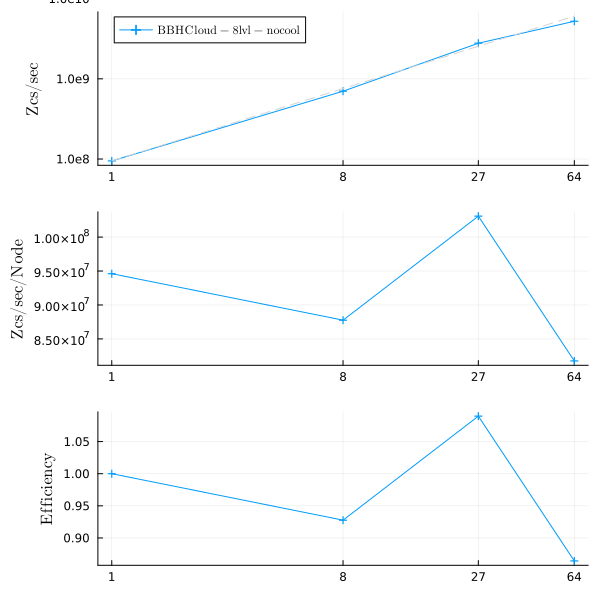

In [3]:
let patt_dirss = [
        ([
            (r"BBHCloud_8lvl_nocool_N\d+_r0000", "BBHCloud-8lvl-nocool"),
        ], "../data/BBHCloud_8lvl_nocool/n256/weak/", :cross),
    ]

    # Plot Zcs/sec
    plt1 = plot(ylabel=L"\mathrm{Zcs}/\mathrm{sec}", xscale=:log10, yscale=:log10)
    xs = [1, 8, 27, 64]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [1e8, 1e9, 1e10]
    yticks!(plt1, ys, [string(n) for n in ys])

    # Plot Efficiency
    plt2 = plot(ylabel=L"\mathrm{Efficiency}", xscale=:log10)
    xticks!(plt2, xs, [string(n) for n in xs])

    plt3 = plot(ylabel=L"\mathrm{Zcs/sec/Node}", xscale=:log10)
    xticks!(plt3, xs, [string(n) for n in xs])
    
    println("Zcs/sec")
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        dats, labs = MiscStdout.load_avgs(patterns, parent_dir; option = "ZcsPerSecond", range=:)
        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            # Plot Zcs/sec
            plot!(plt1, dat[1], dat[2], label = L"\mathrm{%$(labs[i])}", marker = mark)
            plot!(plt1, dat[1], dat[2][1] .* dat[1], label="", linestyle=:dash, color=:lightgray)
            
            @printf("  %8s: [", labs[i])
            println(join([@sprintf(" %8.2e", d) for d in dat[2]], ","), "]")

            # Plot Zcs/sec/Node
            plot!(plt3, dat[1], dat[2] ./ dat[1], label = "",  marker = mark)
            
            # Plot Efficiency
            value_per_node = dat[2] ./ dat[1]
            efficiency = value_per_node ./ first(value_per_node)
            plot!(plt2, dat[1], efficiency, label="", marker = mark)
        end
    end

    plt = plot(plt1, plt3, plt2, layout=(3,1), size=(600, 600))
    display(plt)
end